## Question 4

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import os 
import pandas as pd

data_path = "./"
os.chdir(data_path) 
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

feature_cols = [f'x.{i}' for i in range(1, 31)]
target_col = 'y'

X_train, y_train = train[feature_cols], train[target_col]
X_test, y_test   = test[feature_cols],  test[target_col]

# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate the classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")

Logistic Regression accuracy: 0.879
Support Vector Machine accuracy: 0.8645
Decision Tree accuracy: 0.8105
Random Forest accuracy: 0.8685


## Question 5-(a)

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os 
import pandas as pd

data_path = "./"
os.chdir(data_path) 
df = pd.read_csv("data_usv.csv") 

# Define the feature columns
feature_cols = df.columns

# Split the data into features (X)
X = df[feature_cols]

# Apply PCA and t-SNE
pca = PCA(n_components=10)
tsne = TSNE(n_components=2)

X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)

# Convert the reduced data back to a dataframe
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_tsne = pd.DataFrame(X_tsne, columns=[f"TSNE{i+1}" for i in range(X_tsne.shape[1])])

# Print the reduced data
print("PCA Reduced Data:")
print(df_pca.head())
print("\nTSNE Reduced Data:")
print(df_tsne.head())

PCA Reduced Data:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7   
0   2.658727 -0.342280 -0.126017 -0.189451 -0.667324 -0.118490 -0.292913  \
1  -8.343775 -1.103728  2.153807 -1.760040  0.891875  0.021957  0.076770   
2  11.495425 -1.691569 -1.432683 -0.302038  0.292581  0.559296  0.753936   
3   7.526385  0.897518 -0.307185 -1.167374 -0.271565  0.290381 -0.377080   
4  -9.591016  1.879799 -2.111414  0.425893 -0.641469  0.374362  0.930411   

        PC8       PC9      PC10  
0  0.186955  0.413500  0.160037  
1 -0.577242  0.030290  1.066196  
2  2.140284 -1.131579 -0.158507  
3  0.477081  0.389317  0.586245  
4  0.161854  0.122703  0.921355  

TSNE Reduced Data:
       TSNE1     TSNE2
0  10.786106 -0.774354
1 -33.234196  6.271544
2  53.104664 -4.760033
3  20.654541 -1.266807
4 -31.879063 -6.116181


## Question 5-(b)

/Users/joonmyung/miniconda3/envs/GTC/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


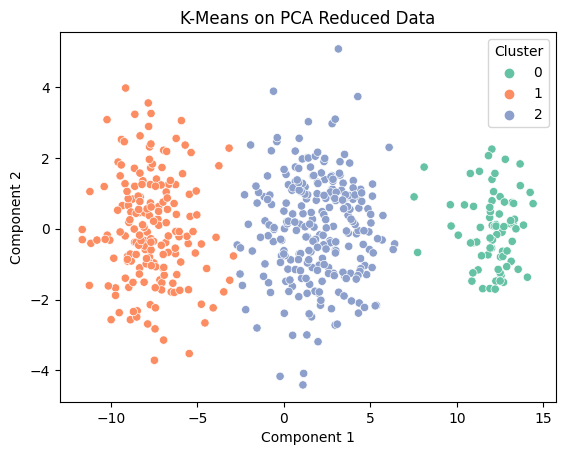

/Users/joonmyung/miniconda3/envs/GTC/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


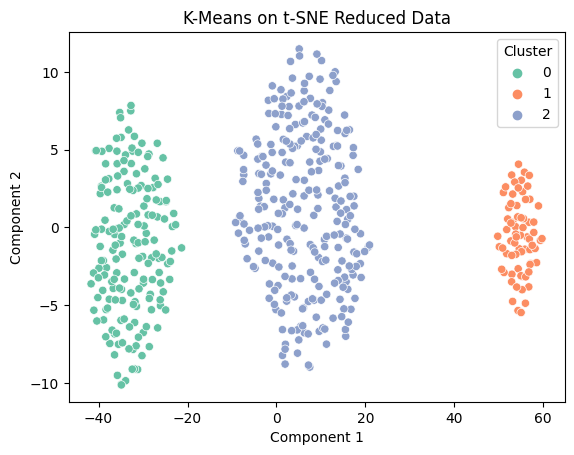

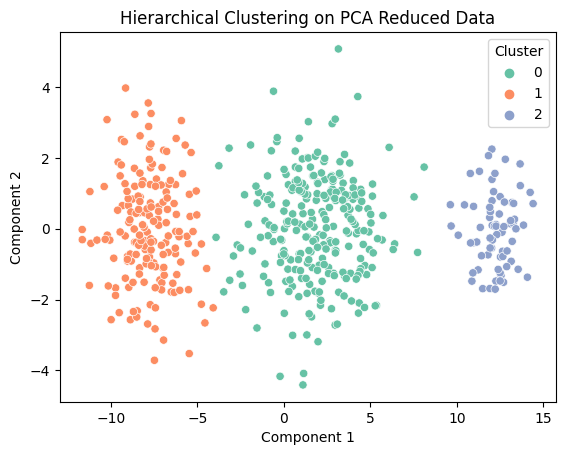

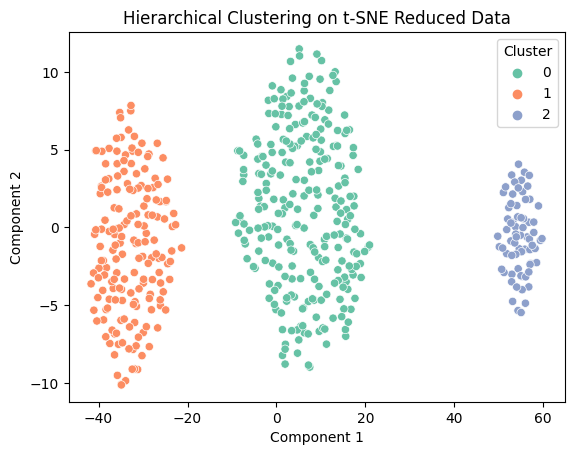

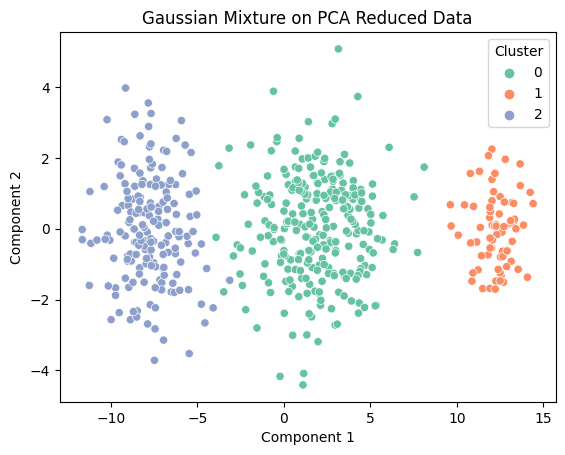

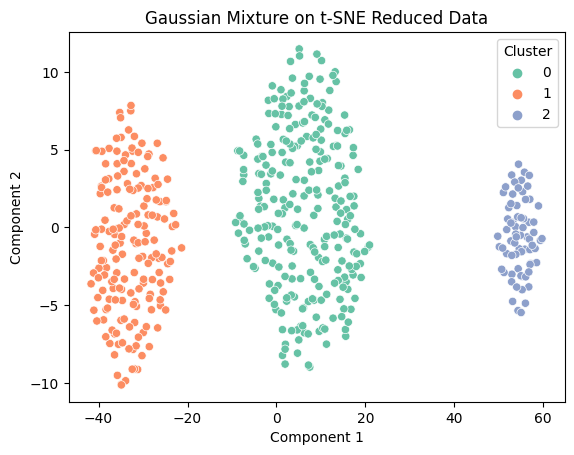

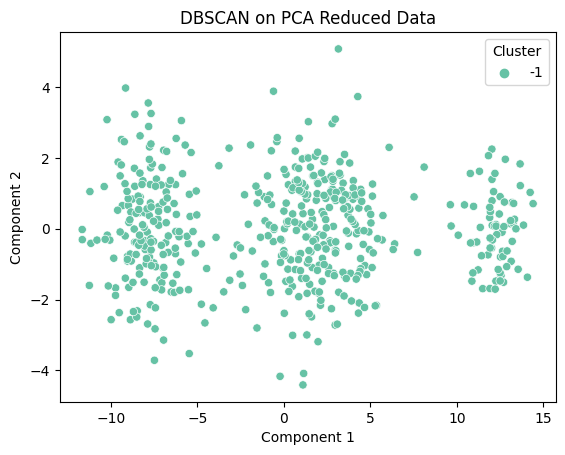

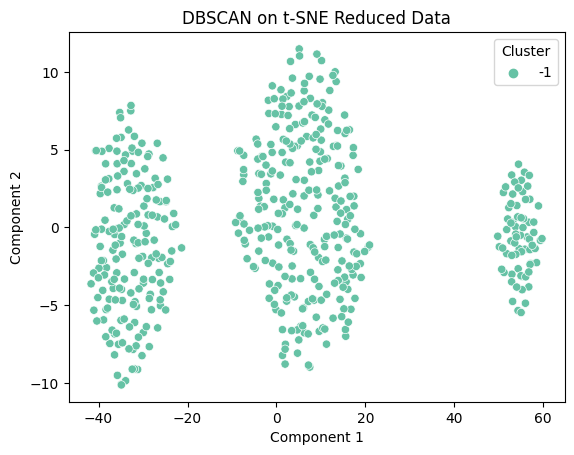

In [16]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Define the clustering methods
clustering_methods = {
    "K-Means": KMeans(n_clusters=3),
    "Hierarchical Clustering": AgglomerativeClustering(n_clusters=3),
    "Gaussian Mixture": GaussianMixture(n_components=3),
    "DBSCAN": DBSCAN()
}

# Apply the clustering methods to the reduced data and visualize the results
for name, method in clustering_methods.items():
    for X_reduced, reduction_method in [(X_pca, "PCA"), (X_tsne, "t-SNE")]:
        labels = method.fit_predict(X_reduced)
        df_reduced = pd.DataFrame(X_reduced, columns=[f"Component {i+1}" for i in range(X_reduced.shape[1])])
        df_reduced['Cluster'] = labels
        sns.scatterplot(data=df_reduced, x="Component 1", y="Component 2", hue="Cluster", palette="Set2")
        plt.title(f"{name} on {reduction_method} Reduced Data")
        plt.show()